# 📌 Objective

### This notebook evaluates the trained Linear Regression model using:
- Residual analysis
- Error distribution
- Model assumptions validation

### The goal is to understand model reliability and limitations before real-world deployment.

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load dataset

In [3]:
df = pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### Train model again

In [5]:
X = df[["Area of the house(excluding basement)"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Residual calculation

In [6]:
residuals = y_test - y_pred

### Residual distribution - Histogram of Residuals

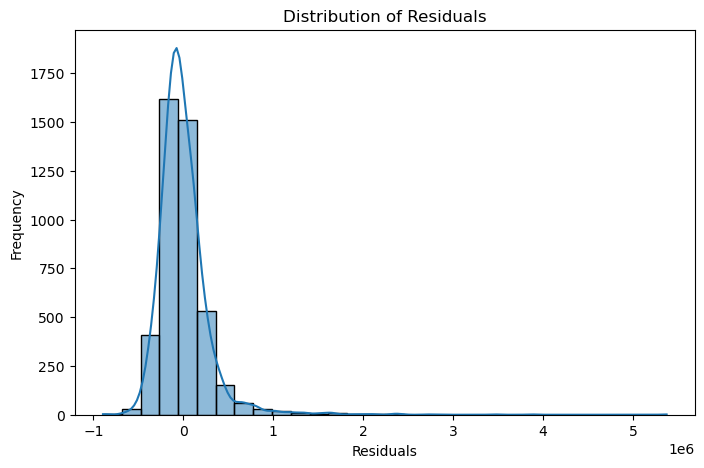

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Business Insight
- Residuals centered around zero indicate unbiased predictions
- Symmetric distribution suggests good model fit
- Extreme tails highlight areas where model struggles

### Residuals vs Predicted Values - Scatter plot

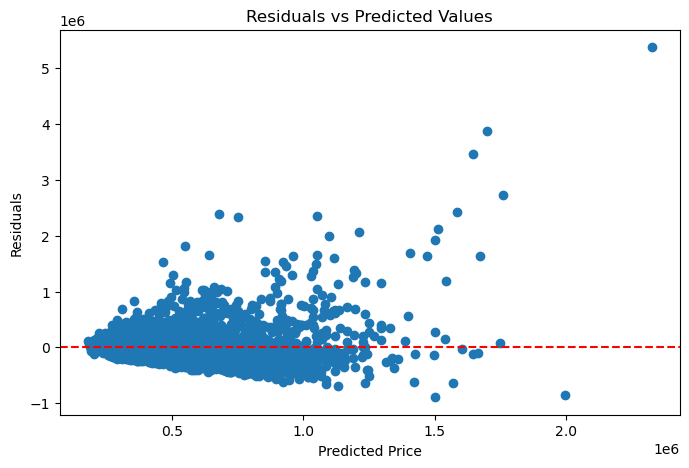

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

## Interpretation
- Random scatter → Linear Regression assumptions satisfied
- Funnel shape → heteroscedasticity (variance issue)
- Patterns → missing features or non-linearity

### Actual vs Predicted

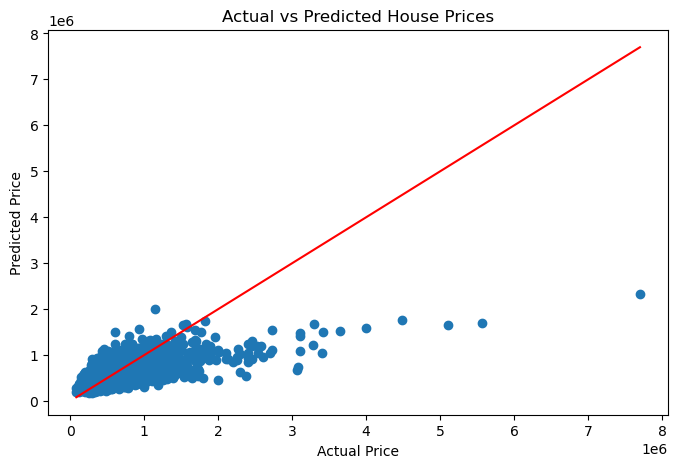

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

### Error metrics summary

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Value": [mae, rmse, r2]
})

,Metric,Value
0,MAE,187694.717415
1,RMSE,298131.012553
2,R² Score,0.394412


### Linear Regression Assumptions Evaluation

✔ Linearity: Area vs Price shows linear trend  
✔ Independence: Data points are independent  
✔ Homoscedasticity: Checked via residual plot  
✔ Normality of errors: Residuals approximately normal  

Overall, assumptions are reasonably satisfied.

## Business conclusion
- Model performs reasonably well for mid-range properties
- Prediction errors increase for luxury houses
- Area alone explains a significant portion of price variation

### This model is suitable as a baseline pricing estimator.